In [126]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
import joblib

In [127]:
# LOADING DATASET
file = '/content/DATASET.xlsx'
years = range(2010, 2017)


In [129]:
# INITIALIZE EMPTY LISTS FOR COMMODITY AND INDUSTRY DATA
all_com_data = []
all_ind_data = []
all_data=[]

# READ AND COMBINE DATA FROM MULTIPLE SHEETS
for year in years:
    data_com = pd.read_excel(file, sheet_name=f'{year}_Detail_Commodity', engine='openpyxl')
    data_ind = pd.read_excel(file, sheet_name=f'{year}_Detail_Industry', engine='openpyxl')

    # ADD YEAR COLUMN FOR REFERENCE
    data_com['Year'] = year
    data_ind['Year'] = year
    data_com['Source']='Commodity'
    data_ind['Source']='Industry'

    # STRIP WHITESPACES FROM COLUMN NAMES
    data_com.columns = data_com.columns.str.strip()
    data_ind.columns = data_ind.columns.str.strip()

    #RENAMING THE COLUMNS
    data_com.rename(columns={'Commodity Code' : 'Code' , 'Commodity Name' : 'Name'},inplace=True)
    data_ind.rename(columns={'Industry Code' : 'Code' , 'Industry Name' : 'Name'},inplace=True)

    all_com_data.append(data_com)
    all_ind_data.append(data_ind)

# COMBINE ALL YEARS INTO SINGLE DATAFRAMES
df_com = pd.concat(all_com_data, ignore_index=True)
df_ind = pd.concat(all_ind_data, ignore_index=True)
all_data.append(pd.concat([df_com,df_ind],ignore_index=True))


In [130]:
print(len(all_data))
print(all_data[0])


1
         Code                                               Name  \
0      1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
1      1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
2      1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
3      1111A0  Fresh soybeans, canola, flaxseeds, and other o...   
4      1111B0          Fresh wheat, corn, rice, and other grains   
...       ...                                                ...   
22087  813B00  Civic, social, professional, and similar organ...   
22088  814000                                 Private households   
22089  814000                                 Private households   
22090  814000                                 Private households   
22091  814000                                 Private households   

            Substance                               Unit  \
0      carbon dioxide       kg/2018 USD, purchaser price   
1             methane       kg/2018 USD, purchaser price   
2

In [131]:
df=pd.concat(all_data,ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Year,Source
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,2010,Commodity
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,2010,Commodity
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,2010,Commodity
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,2010,Commodity
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,2010,Commodity


In [132]:
len(df)

22092

WEEK 2

In [133]:
#DATA PREPROCESSING
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Year', 'Source'],
      dtype='object')

In [134]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


WEEK-2

In [135]:
#REMOVING THE COLUMN WITH ONLY NULL VALUES
df.drop(columns=['Unnamed: 7'],inplace=True)

In [136]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Year', 'Source'],
      dtype='object')

In [137]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [138]:
#CHECKING STATISTICS
print(df.describe().T)

                                                      count         mean  \
Supply Chain Emission Factors without Margins       22092.0     0.084807   
Margins of Supply Chain Emission Factors            22092.0     0.012857   
Supply Chain Emission Factors with Margins          22092.0     0.097681   
DQ ReliabilityScore of Factors without Margins      22092.0     3.308030   
DQ TemporalCorrelation of Factors without Margins   22092.0     2.571429   
DQ GeographicalCorrelation of Factors without M...  22092.0     1.000000   
DQ TechnologicalCorrelation of Factors without ...  22092.0     2.632129   
DQ DataCollection of Factors without Margins        22092.0     1.000000   
Year                                                22092.0  2013.000000   

                                                         std     min     25%  \
Supply Chain Emission Factors without Margins       0.267039     0.0     0.0   
Margins of Supply Chain Emission Factors            0.078720     0.0     0.0   

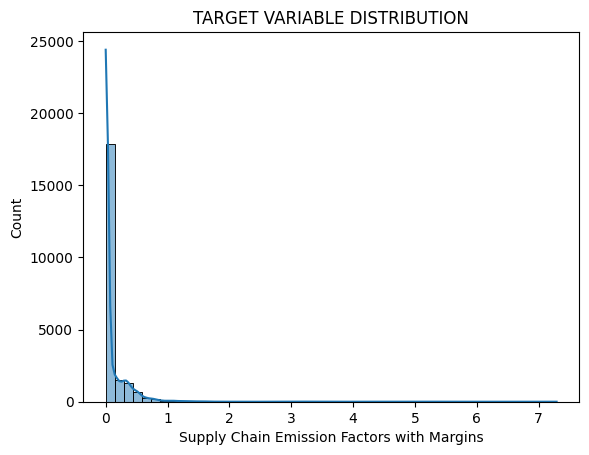

In [139]:
#DATA VISUALIZATION
#HISTOGRAM
sns.histplot(df['Supply Chain Emission Factors with Margins'],bins=50,kde=True)
plt.title('TARGET VARIABLE DISTRIBUTION')
plt.show()

In [140]:
#CHECKING CATEGORICAL FEATURES
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['Code', 'Name', 'Substance', 'Unit', 'Source'], dtype='object')


In [141]:
#PROCESSING FOR SUBSTANCE(feature)
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [142]:
df['Substance'].unique()

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [143]:
#MAPPING USING DICTIONARIES
sub_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}
df['Substance']=df['Substance'].map(sub_map)

In [144]:
#PROCESSING FOR UNIT(feature)
print(df['Unit'].value_counts())
print('\n')
print(df['Unit'].unique())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [145]:
#MAPPING FOR UNIT(feature)
unit_mapping={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}
df['Unit']=df['Unit'].map(unit_mapping)

In [146]:
#PROCESSING FOR SOURCE(feature)
print(df['Source'].value_counts())
print('\n')
print(df['Source'].unique())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


['Commodity' 'Industry']


In [147]:
#MAPPING FOR SOURCE
source_mapping={'Commodity':0, 'Industry':1}
df['Source']=df['Source'].map(source_mapping)

In [148]:
#TOP 25 EMITTIING INDUSTRY
top_emitters=df[['Name','Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values('Supply Chain Emission Factors with Margins',ascending=False).head(25)

In [106]:
top_emitters=top_emitters.reset_index()
print(top_emitters)

                                                 Name  \
0                                Cement manufacturing   
1                                              Cement   
2   Electric power generation, transmission, and d...   
3                                         Electricity   
4                              Dolls, toys, and games   
5                            Lime and gypsum products   
6               Lime and gypsum product manufacturing   
7                        Industrial gas manufacturing   
8                                    Compressed Gases   
9                                            Clothing   
10              Copper, nickel, lead, and zinc mining   
11            Synthetic dye and pigment manufacturing   
12   Alumina refining and primary aluminum production   
13                        Synthetic dyes and pigments   
14                               Truck transportation   
15                                    Truck transport   
16                     Copper, 

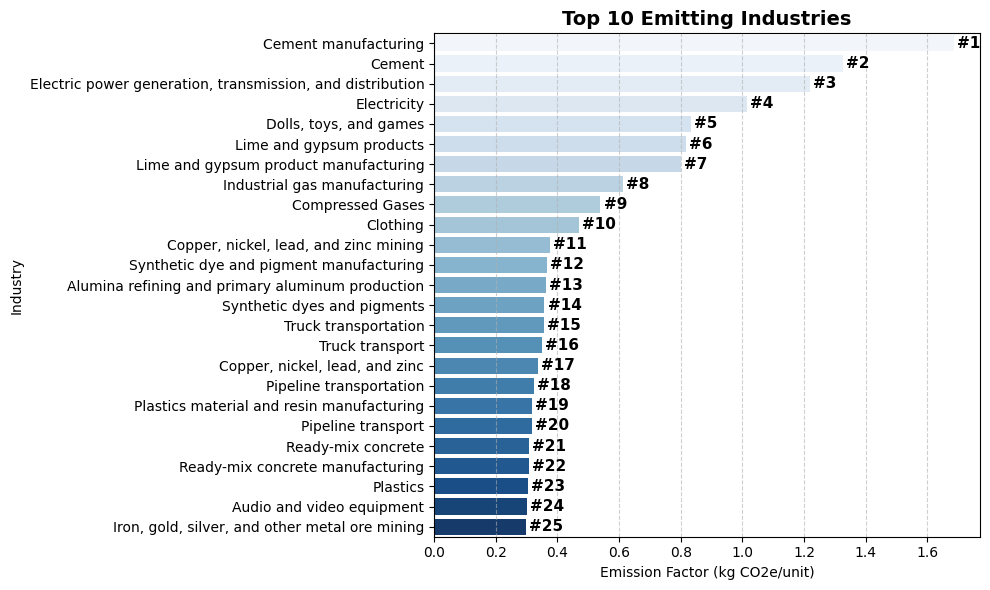

In [118]:
#PLOTTING THE TOP EMITTING INDUSTRIES USING BARPLOT
plt.figure(figsize=(10,6))
sns.barplot(x='Supply Chain Emission Factors with Margins',y='Name',data=top_emitters,hue='Name',palette='Blues')
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')
plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()


In [149]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Year', 'Source'],
      dtype='object')

In [150]:
df.drop(columns=['Name','Code','Year'],inplace=True)

In [151]:
#DEFINING FEATURES AND TARGET
X=df.drop(columns=['Supply Chain Emission Factors with Margins'])
y=df['Supply Chain Emission Factors with Margins']

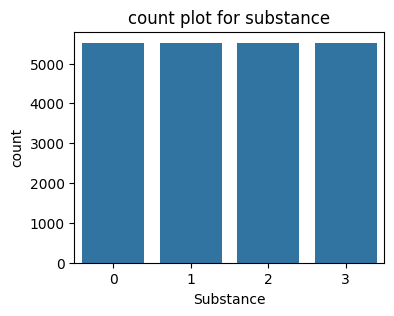

In [155]:
#UNIVARIATE ANALYSIS
plt.figure(figsize=(4,3))
sns.countplot(x=df['Substance'])
plt.title('count plot for substance')
plt.show()

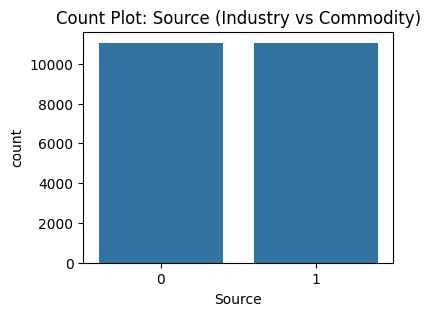

In [161]:
# Count plot for Source
plt.figure(figsize=(4, 3))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.show()


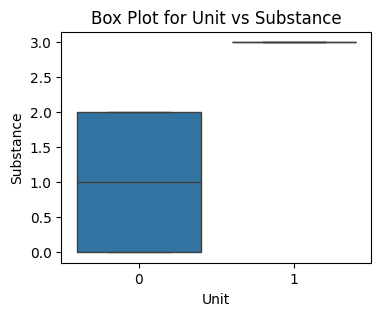

In [171]:
#BOX PLOT
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Unit'],y=df['Substance'])
plt.title('Box Plot for Unit vs Substance')
plt.show()

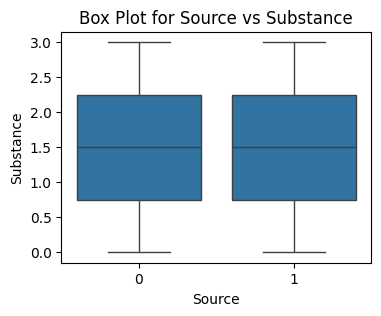

In [174]:
plt.figure(figsize=(4,3))
sns.boxplot(x=df['Source'],y=df['Substance'])
plt.title('Box Plot for Source vs Substance')
plt.show()

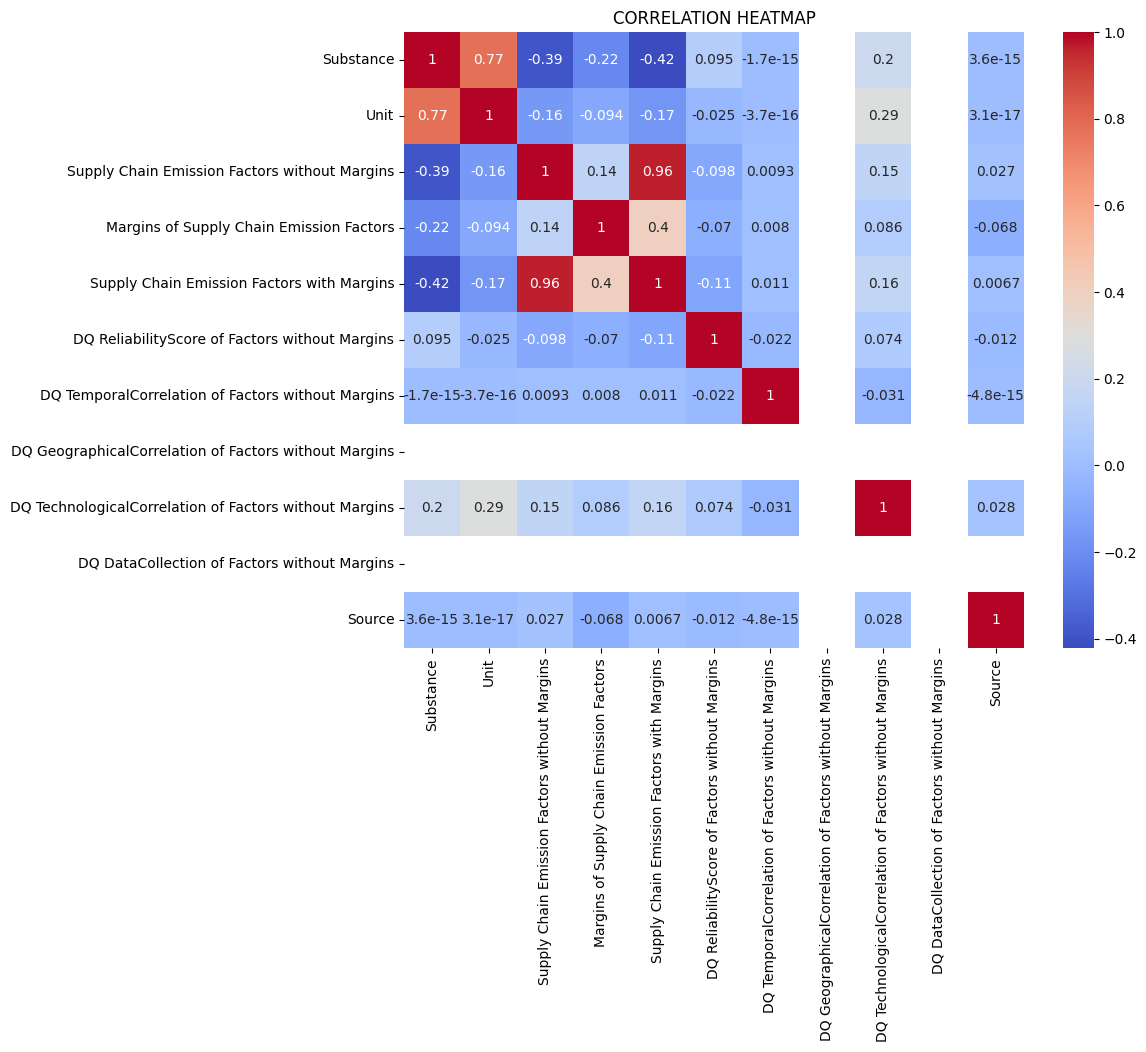

In [165]:
#HEATMAP FOR MULTIVARIATE ANALYSIS
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm')
plt.title("CORRELATION HEATMAP")
plt.show()